In [3]:
from scipy.ndimage import gaussian_laplace
import numpy as np
import matplotlib.pyplot as plt
import skimage

import cv2
from scipy import ndimage

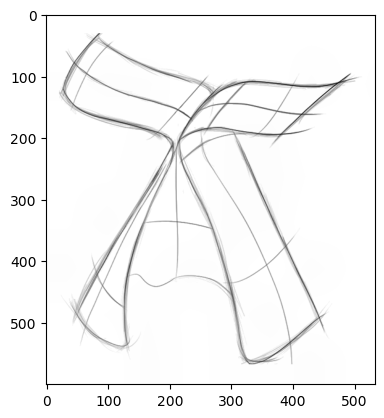

In [28]:
image = skimage.io.imread("stool_0.png", as_gray=True) # must be converted to greyscale
image = skimage.exposure.equalize_adapthist(image, clip_limit=0.03)
plt.imshow(image, cmap='gray')
plt.show()

# TRAPPED-BALL SEGMENTATION

## decorative lines detection

In [20]:
def sobel_filters(img):
    """Returns the magnitude and slope of the gradient of given image"""
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.convolve(img, Kx)
    Iy = ndimage.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    return (G, theta)
    
    
def non_max_suppression(img, angle_matrix):
    M, N = img.shape
    new_img = np.zeros((M,N), dtype=np.int32)
    angle = angle_matrix * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    new_img[i,j] = img[i,j]
                else:
                    new_img[i,j] = 0

            except IndexError as e:
                pass
    
    return new_img

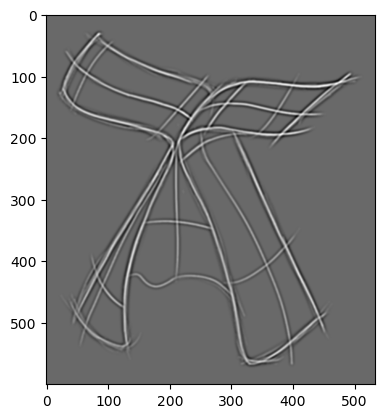

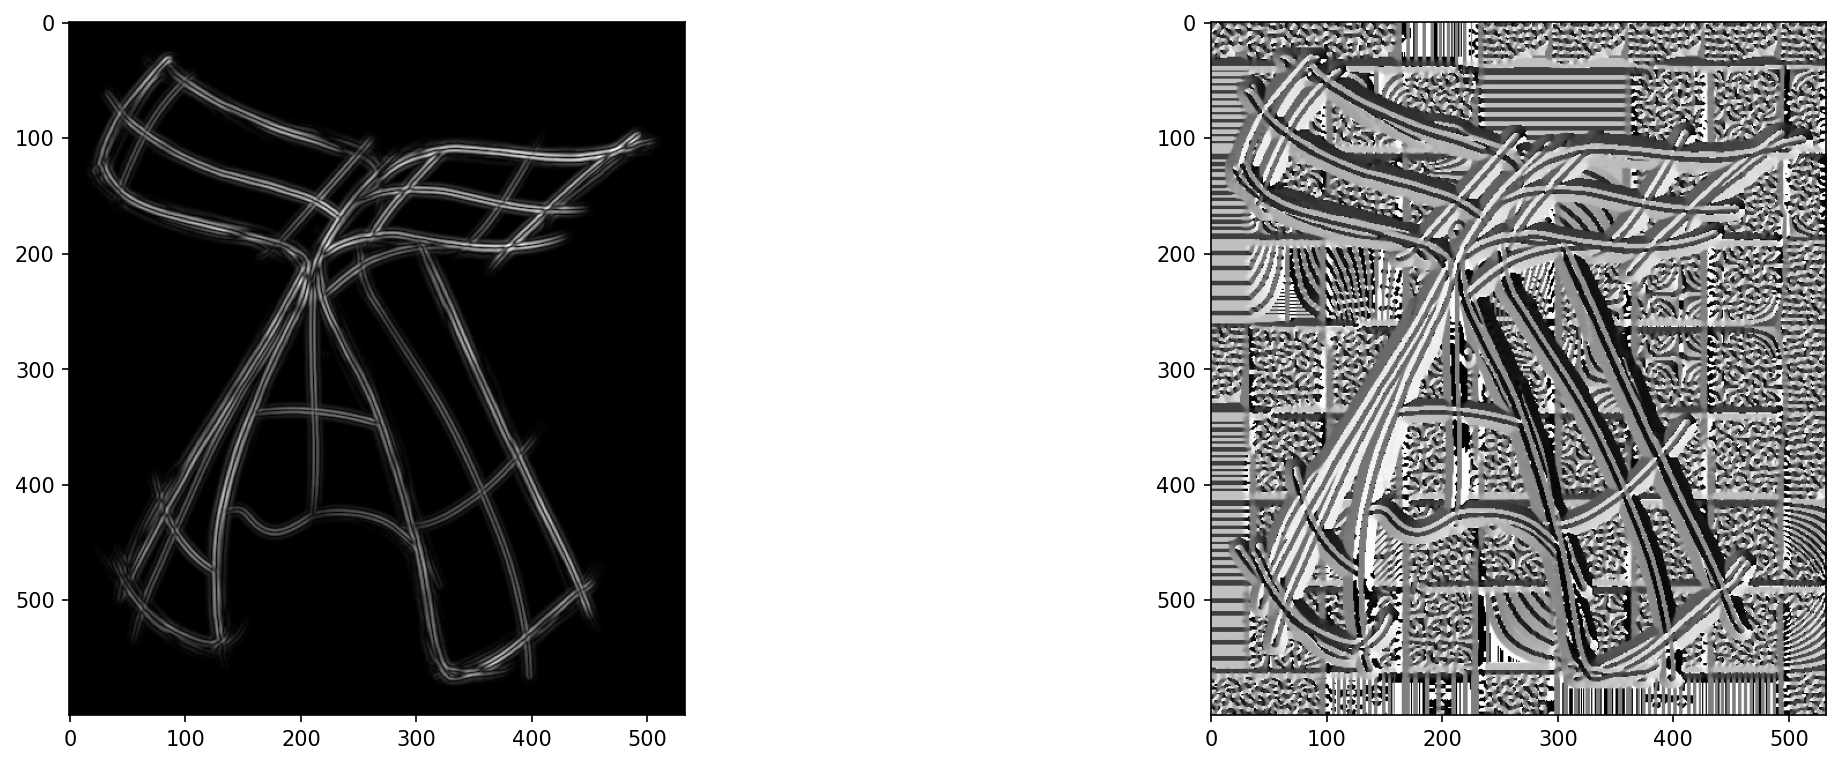

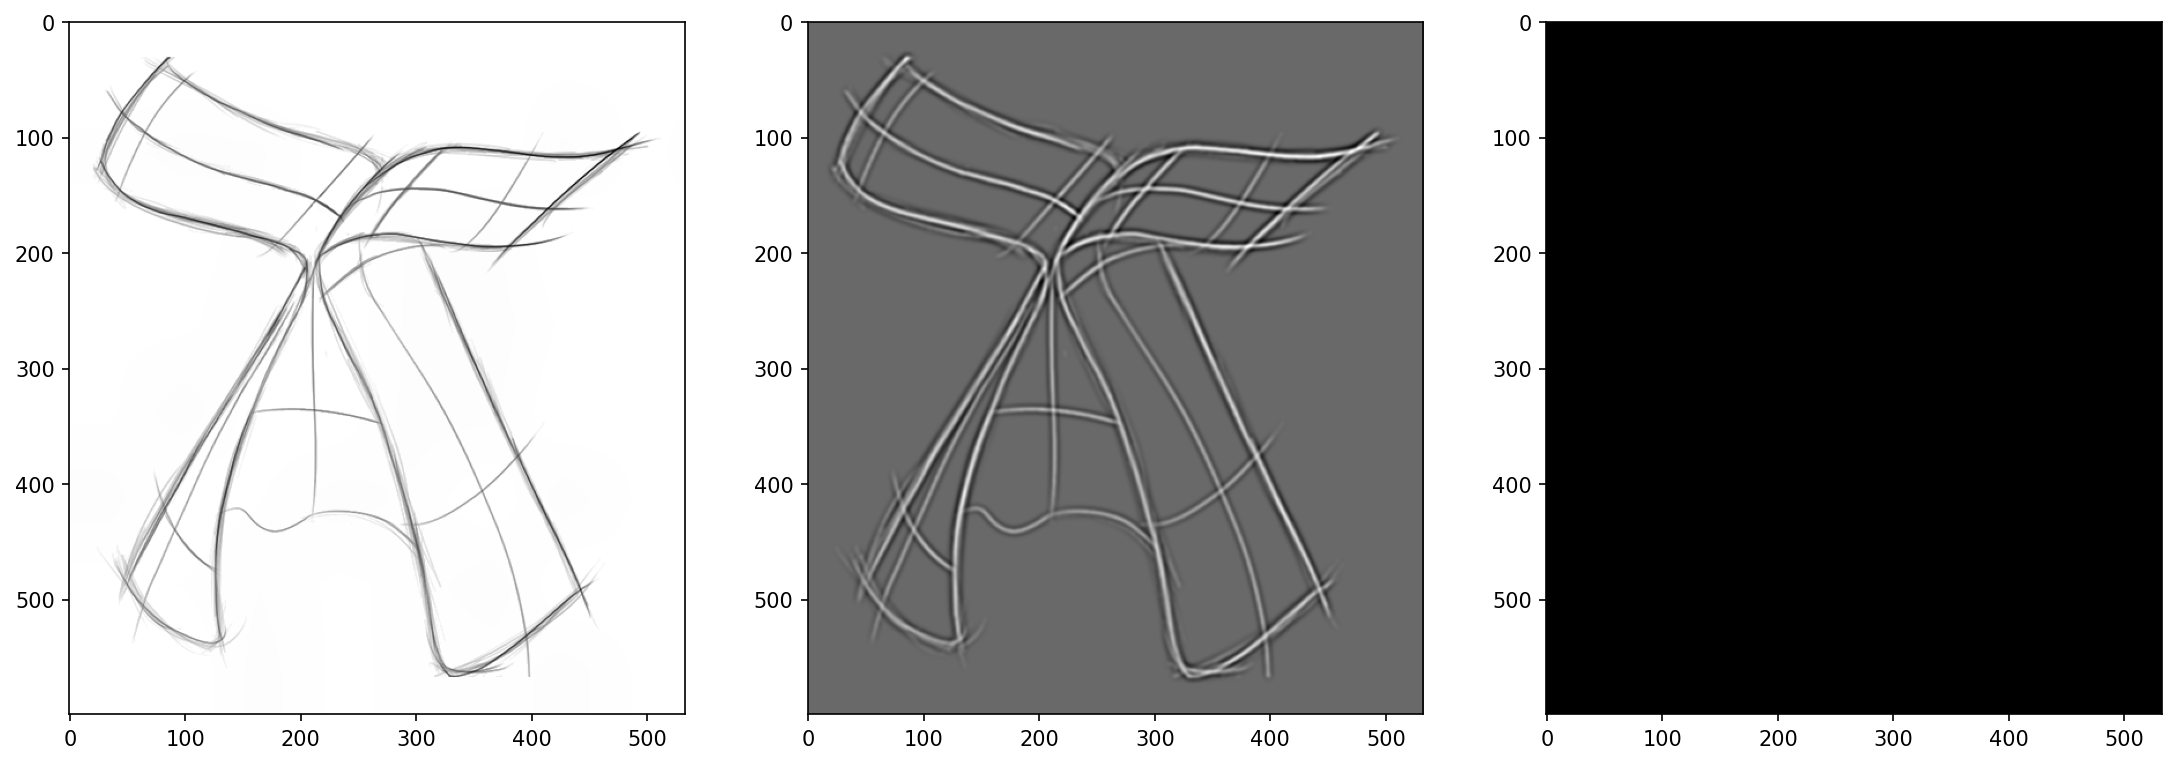

In [30]:
# convolution with 2nd order gaussian
sigma = 2
convolved_image = gaussian_laplace(image, sigma)
plt.imshow(convolved_image, cmap = 'gray')
plt.show()

#gradient and angle matrix
Gradient, theta = sobel_filters(convolved_image)
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)
ax[0].imshow(Gradient, cmap='gray')
ax[1].imshow(theta, cmap='gray')
plt.show()

#non maxima suppression
new_img = non_max_suppression(convolved_image, theta)

fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=150)
ax[0].imshow(image, cmap='gray')
ax[1].imshow(convolved_image, cmap='gray')
ax[2].imshow(new_img, cmap='gray')
plt.show()

# applying canny edge detection
#edge = cv2.Canny(img_blur, 20, 30)

#fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)
#ax[0].imshow(img, cmap='gray')
#ax[1].imshow(edge, cmap='gray')